<h1 align="center">Volume 4: Spectral 2.</h1>

    NAME
    Section #
    DATE

In [83]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

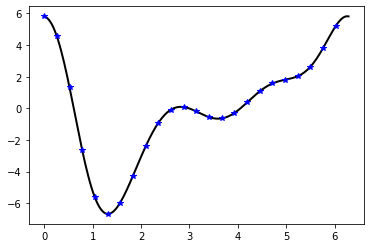

In [84]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

/var/folders/j1/rssdx9h148g0ptj4pj02c_0m0000gn/T/ipykernel_79197/1697757781.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,(fpp/2)-fp,'-k',linewidth=2.,color = 'black')
/var/folders/j1/rssdx9h148g0ptj4pj02c_0m0000gn/T/ipykernel_79197/1697757781.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1,(fpp/2)-fp,'*b',color = 'blue')


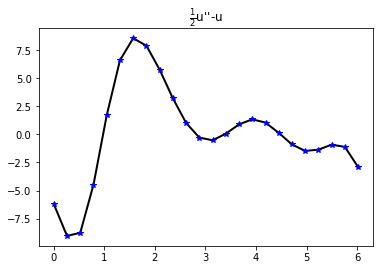

In [85]:
N=24
# Code from the spec
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# get the first derivative
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# get the second derivative
fpp_hat = (1j*k)*fp_hat
fpp = np.real(ifft(fpp_hat))

#plotting
plt.plot(x1,(fpp/2)-fp,'-k',linewidth=2.,color = 'black')
plt.plot(x1,(fpp/2)-fp,'*b',color = 'blue')
plt.title(r"$\frac{1}{2}$u''-u")
plt.show()

# Problem 2 - setup

In [86]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.nda6rray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

def RK4(f,X,Y,h,n):
    for i in range(n-1):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2,Y[i]+h/2*K1)
        K3 = f(X[i]+h/2,Y[i]+h/2*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6*(K1+2*K2+2*K3+K4)
    return Y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

In [87]:
# Quinlan's RK4
def RK4(f, t0, tf, y0, n):
    """
    Uses the Runge-Kutta 4 method to solve the IVP
        y' = f(t, y)
        y(0)=y0
    Arguments:
        f - RHS of ode
        t0, tf - initial and final x values to be evaluated at
        y0 - initial value
        n - number of points
    Returns:
        t, y - arrays of t and y values at every point of solution
    """
    #Create arrays for t and y values
    t, h = np.linspace(t0, tf, n, retstep=True)
    
    if np.isscalar(y0):
        y = np.zeros(n)
        y[0] = y0
    else:
        y = np.zeros((n, y0.shape[0]))
        y[0] = y0
    
    for i in range(n-1):
        K1 = f(t[i], y[i])
        K2 = f(t[i]+h/2, y[i]+h/2*K1)
        K3 = f(t[i]+h/2, y[i]+h/2*K2)
        K4 = f(t[i+1], y[i]+h*K3)
        y[i+1] = y[i] + h/6*(K1+2*K2+2*K3+K4)
    return t, y

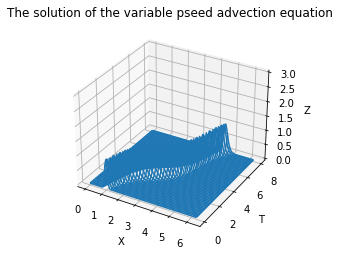

In [88]:
t_steps = 150    # Time steps
x_steps = 100     # x steps
N = 100


#'''

#getting the domains
t_domain = np.linspace(0,8, t_steps)
x_domain = np.linspace(0,2*np.pi, x_steps)

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

#getting the functions
c = lambda x: .2+(np.sin(x-1))**2
u = lambda x: np.exp(-N*(x-1)**2)
f = lambda t,u : -c(x_domain)*np.real(ifft(1j*k*fft(u)))

#'''

#getting the solution and plotting
sol = RK4(f,0,8,u(x_domain),t_steps)[1]
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.title("The solution of the variable pseed advection equation")
plt.xlabel("X")
plt.ylabel("T")
ax.set_zlabel('Z')
plt.show()